In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1) 데이터 이해

In [41]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/train.csv')
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### (1) 중요하다고 생각하는 변수 주관적 분석 <br>
>Numerical Variable :<br>
&nbsp;&nbsp;&nbsp;&nbsp;Buiding - OverallQual (건물 품질), YearBuilt <br>
>Categorical Variable : <br>
&nbsp;&nbsp;&nbsp;&nbsp;Space - TotalBsmtSF (지하층 면적), GrLivArea (지상 거주 면적) : 

In [42]:
#데이터 기술통계량
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

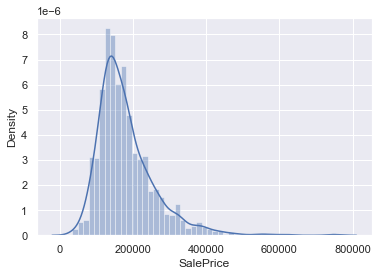

In [43]:
#데이터 분포도
sns.distplot(df_train['SalePrice']);

In [44]:
print("Skewness: %f" % df_train['SalePrice'].skew())     #왜도
print("Kurtosis: %f" % df_train['SalePrice'].kurt())     #첨도

Skewness: 1.882876
Kurtosis: 6.536282


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


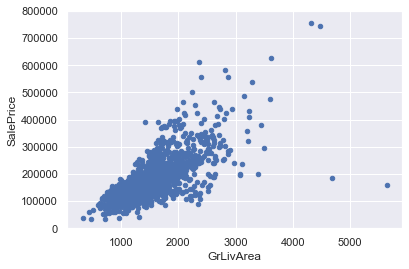

In [45]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# GrLivArea (지상 면적)은 집값과 선형 관계처럼 보임

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


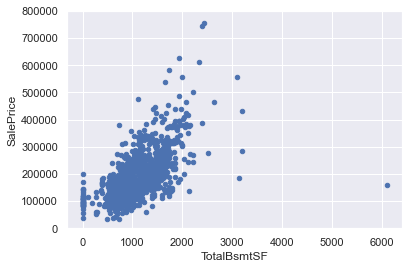

In [46]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# TotalBsmtSF (지하 면적)도 집값과 선형 관계처럼 보임

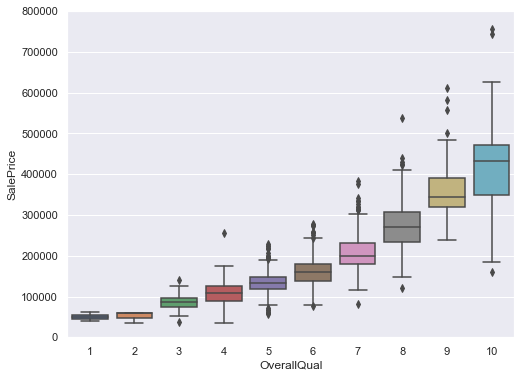

In [47]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# OverallQual (건물 품질)에 따라 집값이 높아짐

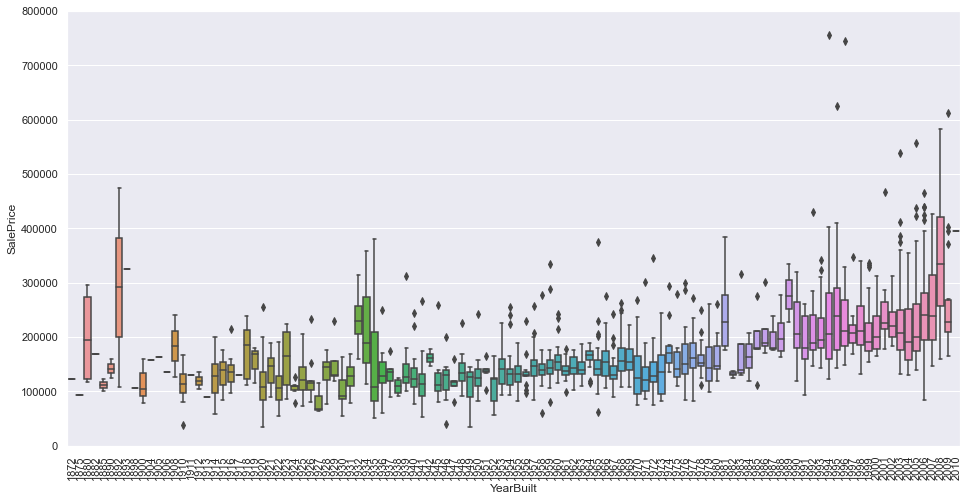

In [48]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# 두드러지는 경향은 나타나지 않음
# 신축 건물에 가까울수록 더 많은 돈을 지불하려는 경향이 보임

### (2) 모든 변수 분석
> 공학적인 접근으로 모든 변수에 대해 분석할 필요 있음

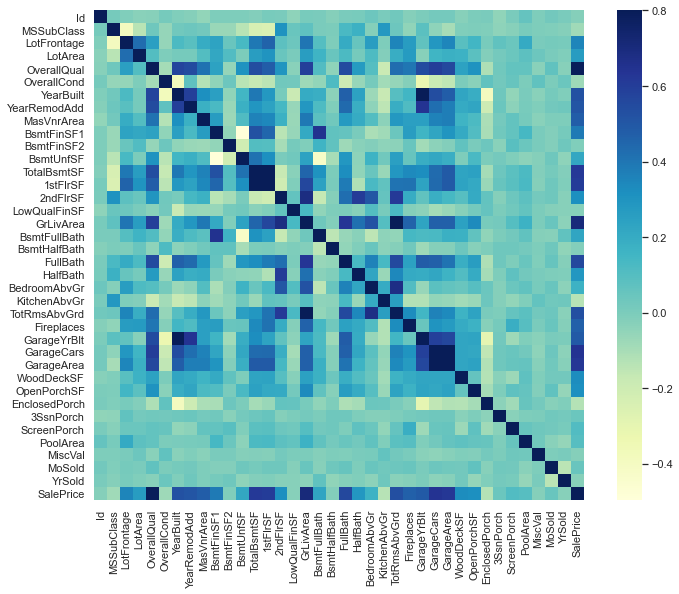

In [49]:
# Correlation matrix (heatmap style)

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu");

> 대각 성분 이외의 짙은 색을 보고 다중공선성(multicollinearity)을 찾아냄 <br>
SalePrice 행 또는 열을 보고 집값에 영향이 큰 변수들을 찾을 수 있음

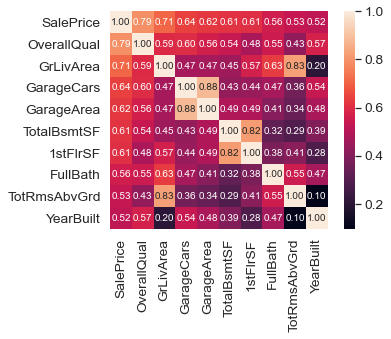

In [50]:
# SalePrice correlation matrix

k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index     # pandas.nlargest(n, columns) : column에서 내림차순으로 n개의 행만 남김
cm = np.corrcoef(df_train[cols].values.T)                      # np.corrcoef() : 피어슨 상관 계수
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

>SalePrice에 연관성이 높지만, 비슷한 변수들은 다중공선성을 막기 위해 선택해야 함
>>GarageCars, GarageArea<br>
TotalBsmtSF (지하 면적), 1stFlrSF (1층 면적) <br>
TotRmsAbvGrd (방 개수), GrLivArea (지상 면적)<br>
YearBuilt는 time-series 시계열 데이터로 분석을 고려해볼 수 있음

### &nbsp; &nbsp;&nbsp; 선택 변수
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'



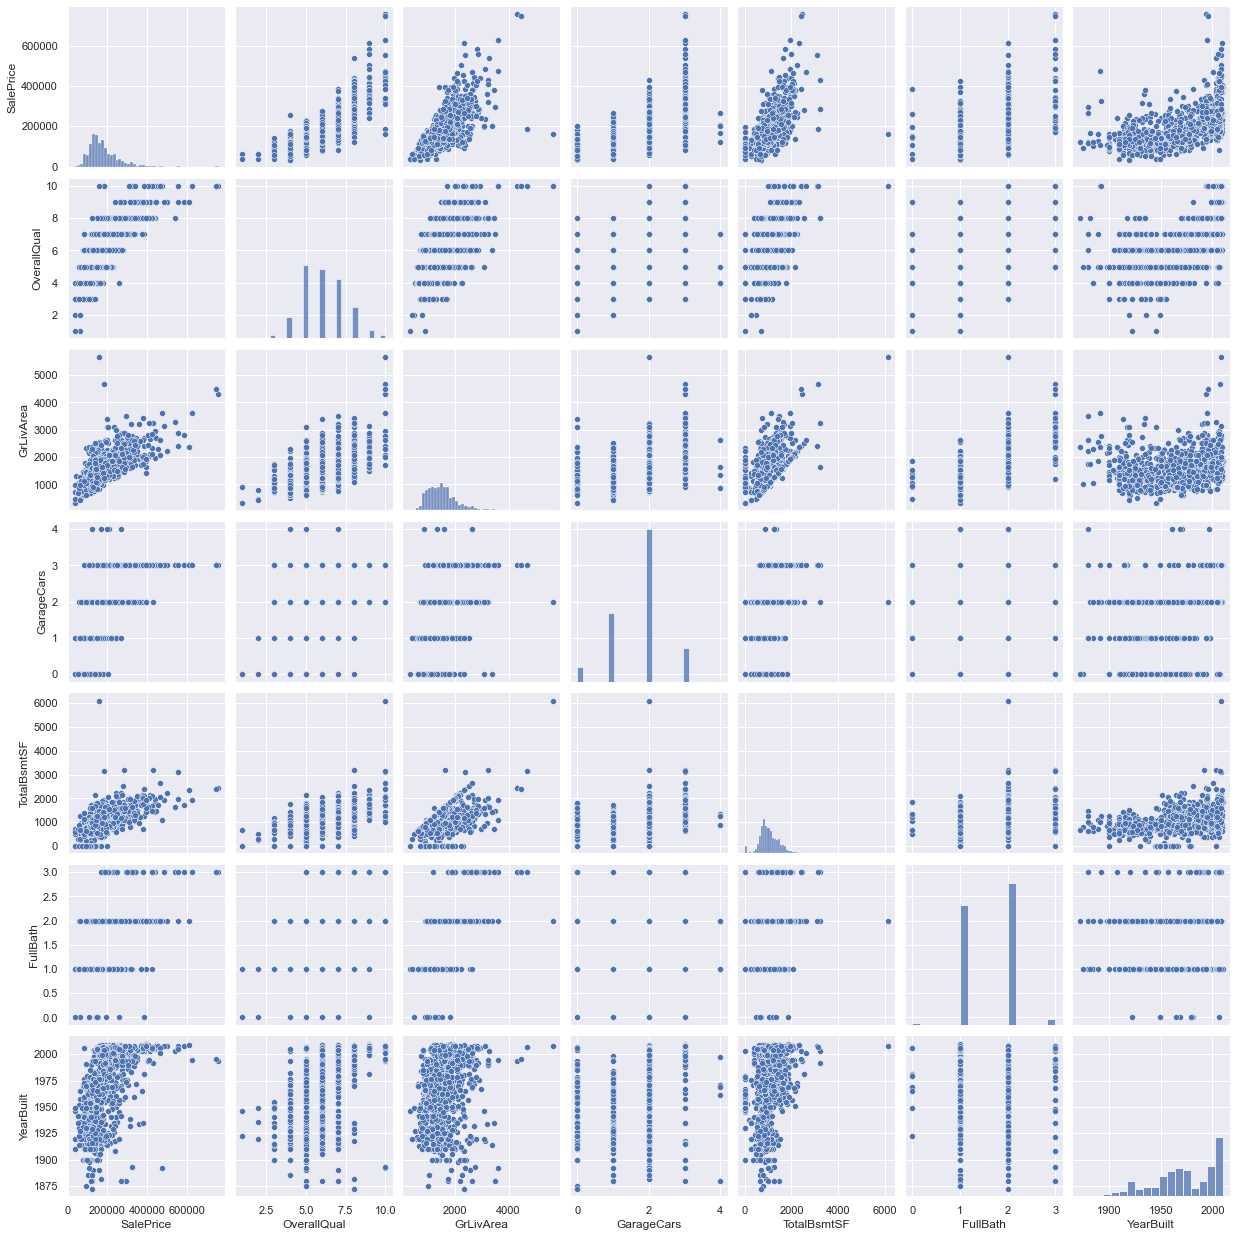

In [51]:
# Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# 'TotalBsmtSF'와'GrLiveArea' 를 보면, 지하 면적은 일반적으로 지상 면적보다 같거나 작음
# 'SalePrice'와 'YearBuilt'를 보면, 집값의 상한선은 년을 거듭하며 빠르게 exponential로 증가함을 볼 수 있음

### (3) 결측치 채우기

In [52]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


SalePrice와 큰 관련이 없는 변수는 지워도 됨
> PoolQC (Pool quality), MiscFeature, Alley (골목 접근성), Fence

PoolQC, MiscFeature, FireplaceQu (난방) : outlier를 형성시키는 변수는 지우는 게 좋음

GarageX 변수들은 같은 개수의 결측치 존재 : 같은 관찰에서 얻어진 데이터 → GarageCars에 포함된 정보이므로 삭제<br>
BsmtX 변수들도 마찬가지 이유로 삭제

MasVnrArea (Masonry veneer area, 벽돌 베니어 면적), MasVnrType : 필요 없는 정보. YearBuilt, OverallQual와 상관성 높음

Electrical 결측치는 한 개이므로, 해당 데이터를 삭제하고 변수 유지

#### ※ Electrical을 제외한 변수들 모두 삭제

In [53]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

### (4) Outlier

In [54]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

# sklearn.preprocessing.StandardScaler : (X-u)/s  (변수값-평균값)/표준편차 정규화
# 낮은 10개 값은 모여있고 0에서 크게 벗어나지 않지만, 높은 값은 3~7로 멀리 벗어나 있음

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


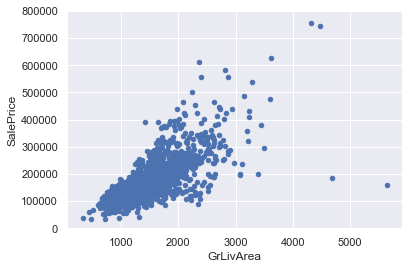

In [55]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), c='b');

In [56]:
# 면적이 큰 두 점이 crowd에서 벗어나 있음 : 농경지와 같이 전형적인 건물이 아닐 가능성이 큼
# 두 점은 outlier로 삭제

df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

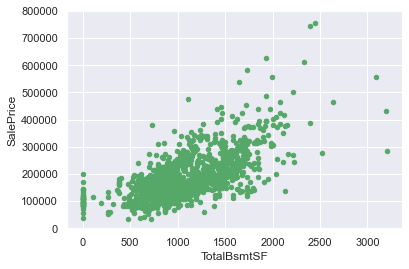

In [57]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), c='g');

In [58]:
# Outlier라고 할 만한 점이 보이지 않음

In [59]:
predictor_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
train = df_train[predictor_cols]
y_train = df_train['SalePrice']

In [60]:
train

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,7,1710,2,856,2,2003
1,6,1262,2,1262,2,1976
2,7,1786,2,920,2,2001
3,7,1717,3,756,1,1915
4,8,2198,3,1145,2,2000
...,...,...,...,...,...,...
1455,6,1647,2,953,2,1999
1456,6,2073,2,1542,2,1978
1457,7,2340,1,1152,2,1941
1458,5,1078,1,1078,1,1950


# 2) 모델 생성, Test Data 예측

In [61]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
# import lightgbm as lgb

In [62]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [63]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 34514.3994 (2919.0744)



In [64]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 34514.3569 (2919.0387)



In [65]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 27996.0351 (722.7775)



In [66]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 29916.0578 (2196.8640)



In [67]:
test = pd.read_csv('data/test.csv')
predictor_cols = ['Id', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
test_data=test[predictor_cols]

total = test_data.isnull().sum().sort_values(ascending=False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

# test데이터의 결측치 확인

,Total,Percent
GarageCars,1,0.000685
TotalBsmtSF,1,0.000685
Id,0,0.000000
OverallQual,0,0.000000
GrLivArea,0,0.000000
FullBath,0,0.000000
YearBuilt,0,0.000000


In [68]:
test_data = test_data.drop(test_data.loc[test_data['GarageCars'].isnull()].index)
test_data = test_data.drop(test_data.loc[test_data['TotalBsmtSF'].isnull()].index)
test_data.isnull().sum().max()       # 결측치 삭제됐는지 확인

test_Id = test_data['Id']
test_data = test_data.drop(columns = ['Id'])

# test데이터의 결측치는 1개씩이므로 해당 데이터만 삭제 후 예측

In [69]:
import os
if os.path.exists("results") == 0:
    os.mkdir("results")

In [70]:
lasso.fit(train, y_train)
predicted_prices = lasso.predict(test_data)
print(predicted_prices)

[106375.22921245 171847.63160339 171103.49083573 ... 153224.24749396
 114236.63438287 244757.94914244]


In [71]:
my_submission = pd.DataFrame({'Id': test_Id, 'SalePrice': predicted_prices})
my_submission.to_csv('results/submission_lasso.csv', index=False)

In [72]:
ENet.fit(train, y_train)
predicted_prices = ENet.predict(test_data)
print(predicted_prices)

[106376.59870058 171843.11434775 171106.81767183 ... 153225.01936799
 114231.13545235 244756.48820686]


In [73]:
my_submission = pd.DataFrame({'Id': test_Id, 'SalePrice': predicted_prices})
my_submission.to_csv('results/submission_ENet.csv', index=False)

In [74]:
KRR.fit(train, y_train)
predicted_prices = KRR.predict(test_data)
print(predicted_prices)

[116480. 157568. 164736. ... 141952. 117568. 236928.]


In [75]:
my_submission = pd.DataFrame({'Id': test_Id, 'SalePrice': predicted_prices})
my_submission.to_csv('results/submission_KRR.csv', index=False)

In [76]:
GBoost.fit(train, y_train)
predicted_prices = GBoost.predict(test_data)
print(predicted_prices)

[123926.9186188  156359.71043859 180059.98901647 ... 148838.72604345
 110617.08926531 231069.78006298]


In [77]:
my_submission = pd.DataFrame({'Id': test_Id, 'SalePrice': predicted_prices})
my_submission.to_csv('results/submission_GBoost.csv', index=False)

Stacked 모델, nan???

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

averaged_models = AveragingModels(models = (ENet, KRR, GBoost))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))